# Klasifikacija

In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('/content/drive/MyDrive/II kolokvium vnp-aud/Copy of heart.csv')

In [ ]:
data.head() # spored poveke vlezni koloni ni kazuva dali ima ili nema odredena srceva bolest - klasifikacija
# target - dali ke ima ili ne

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Preprocesiranje
- dali ima missing values
- dali ima potreba od skaliranje

In [ ]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
# prvo ke go podelime
from sklearn.model_selection import train_test_split

X = data.drop(['target'], axis = 1)
Y = data['target']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

In [ ]:
# da gi skalirame
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
len(X_train[0]) #OVA NI E POTREBNO za input dim kaj seq modelot

13

In [ ]:
#Note: First, we choose a sequential model.
#Note: Second, we choose the layers to be dense.
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

In [ ]:

#Note: The first layer is the input layer. The value 32 signifies the number of nodes in the layer
model.add(Dense(32, input_dim=13, kernel_initializer='uniform', activation='relu')) 

In [ ]:
#Note: We then add the hidden layers to the model- moze da si gi namestis brojcinjata zavisno od modelot probaj ili epten mali ili golemi
# za da vidis generalno vo koja nasoka da se dvizis da za dobies podobri rez
#Note: The rectified linear activation function or ReLU for short is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero. 
#Note: It has become the default activation function for many types of neural networks because a model that uses it is easier to train and often achieves better performance.
model.add(Dense(16, kernel_initializer='uniform', activation='relu'))
model.add(Dense(16, kernel_initializer='uniform', activation='relu'))

In [ ]:
#Note: We finally add the output layer.
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
   #sigmoid za klasifickacija  
   #1 -> bidejki ocekuvame eden output - dali TARGET e 0 ili 1, ako primer vo y imavme 2 klasi koi gi predict ke bese tuka 2

In [ ]:
#Note: kompajlirame
#binary koga imame klaficikacija kako sega 0/1
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [ ]:
model.fit(X_train, Y_train, epochs=100, batch_size=10)  #podesi si gi epohite i batch-ovite

Epoch 1/100
25/25 [==============================] - 2s 5ms/step - loss: 0.6930 - accuracy: 0.5331
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6903 - accuracy: 0.6033
Epoch 3/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6733 - accuracy: 0.8306
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6066 - accuracy: 0.8430
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.4756 - accuracy: 0.8471
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.3786 - accuracy: 0.8512
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3536 - accuracy: 0.8512
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3467 - accuracy: 0.8512
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 0.3423 - accuracy: 0.8678
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 0.3357 - accuracy: 0.8678
Epoch 11/

In [ ]:
y_pred = model.predict(X_test)  #predictnuvame

2/2 [==============================] - 0s 8ms/step


In [ ]:
#zaokruzi gi za dole da ti funkcioniraat metrikite
y_pred = y_pred.round() 


accuracy of the model:  0.8852459016393442


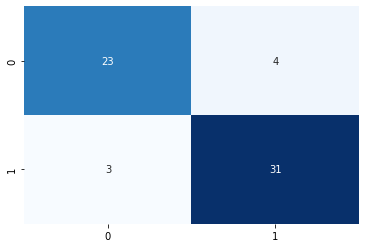

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(Y_test, y_pred.round())
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)

ac = accuracy_score(Y_test, y_pred.round())
print('accuracy of the model: ', ac)

# Regresija

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/II kolokvium vnp-aud/Copy of Admission_Predict.csv')


In [ ]:
data.head() #da predvidime kolkava e sansata nekoj student da bide primen brz osnova na nekoi ocenki, ratings itn,.

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
data.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

# X - site koloni od prvatata do pretposlednata, bez serial no zasto ne ni treba visok kolona
# Y - chance of admit
X_train, X_test, Y_train, Y_test = train_test_split(data.iloc[:, 1:-1], data.iloc[:, -1:], test_size = 0.2, random_state=0)

In [ ]:
# da skalirame

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
len(X_train[0]) #pak za input slojot za input dim

7

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

model = Sequential()

In [ ]:
#input sloj
model.add(Dense(16, input_dim=7, kernel_initializer='uniform', activation='relu')) 

In [ ]:
#Note: Dropout removes relationships at random. Input shape gives the number of neurons in the layer before.
model.add(Dropout(0.1, input_shape=(16,))) #16 kako  u input slojot sto ni e!!!!

model.add(Dense(8, kernel_initializer='uniform', activation='relu')) #sloj 1
model.add(Dropout(0.1, input_shape=(8,))) # 8 kako u sloj 1 sto ni e

model.add(Dense(8, kernel_initializer='uniform', activation='relu')) #sloj 2
model.add(Dropout(0.1, input_shape=(8,))) # 8 kako u sloj 2 sto ni e 

model.add(Dense(8, kernel_initializer='uniform', activation='relu')) #sloj 3

model.add(Dense(4, kernel_initializer='uniform', activation='relu')) #sloj 4
# ako sakavme tuka droput model.add(Dropout(0.1, input_shape=(4,)))

model.add(Dense(4, kernel_initializer='uniform', activation='relu')) #sloj 5

In [ ]:
#output
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid')) #povtorno imame samo edno vo ouput-ot - sansata za admit

In [ ]:
# kompajliraj

model.compile(loss='mean_squared_error', optimizer='adam') 


In [ ]:
# za da moze da se analizira ke go stavime vo history

history = model.fit(X_train, Y_train, epochs=70, batch_size=8,  verbose=1, validation_split=0.2)


Epoch 1/70
32/32 [==============================] - 1s 7ms/step - loss: 0.0683 - val_loss: 0.0761
Epoch 2/70
32/32 [==============================] - 0s 3ms/step - loss: 0.0641 - val_loss: 0.0711
Epoch 3/70
32/32 [==============================] - 0s 4ms/step - loss: 0.0590 - val_loss: 0.0649
Epoch 4/70
32/32 [==============================] - 0s 3ms/step - loss: 0.0523 - val_loss: 0.0555
Epoch 5/70
32/32 [==============================] - 0s 3ms/step - loss: 0.0391 - val_loss: 0.0299
Epoch 6/70
32/32 [==============================] - 0s 4ms/step - loss: 0.0126 - val_loss: 0.0073
Epoch 7/70
32/32 [==============================] - 0s 3ms/step - loss: 0.0071 - val_loss: 0.0067
Epoch 8/70
32/32 [==============================] - 0s 3ms/step - loss: 0.0066 - val_loss: 0.0066
Epoch 9/70
32/32 [==============================] - 0s 3ms/step - loss: 0.0067 - val_loss: 0.0065
Epoch 10/70
32/32 [==============================] - 0s 3ms/step - loss: 0.0066 - val_loss: 0.0063
Epoch 11/70
32/32 [

Ako ne si sigurna za epohite preku ova plot mozes da vidis deka 10/20 tuka nekade pocnuvaat da se isti znaci dali ke stavis soo 20 ili 70 epohi isto mu doaga u r2 score samo plotiranjeto ke bide malku porazlicno so 20 (popregledno)

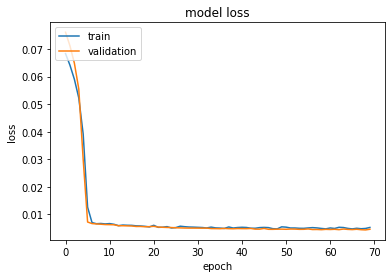

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show() 

In [ ]:
y_pred = model.predict(X_test) 


3/3 [==============================] - 0s 5ms/step


In [ ]:
from sklearn.metrics import r2_score
print("r_square score: ", r2_score(Y_test,y_pred))

r_square score:  0.6997112826512986




```
# This is formatted as code
```

# LSTM

In [ ]:
# lstm najcesto se koristi za time series
#tuka sakame da predviduvame vrednost na bitcoin

import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/II kolokvium vnp-aud/Copy of bitstampUSD_1-min_data_2012-01-01_to_2021-03-31 (1).csv')

In [ ]:
# null?
df.isna().sum()

Timestamp                  0
Open                 1243608
High                 1243608
Low                  1243608
Close                1243608
Volume_(BTC)         1243608
Volume_(Currency)    1243608
Weighted_Price       1243608
dtype: int64

In [ ]:
df.fillna(method='ffill', inplace=True)


In [ ]:
df.columns[:5] #ne interesira close bidejki togas e najvisokata cena na bitcoinot i timestampot pa tie ke gi zadrzime

Index(['Timestamp', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [ ]:

df.drop(df.columns[1:4], axis=1,inplace=True) #drugo se ke dropneme


In [ ]:
df.drop(df.columns[-3:], axis=1,inplace=True)#drugo se ke dropneme


In [ ]:
df.head()

,Timestamp,Close
0,1325317920,4.39
1,1325317980,4.39
2,1325318040,4.39
3,1325318100,4.39
4,1325318160,4.39


In [ ]:
# gi zemame za prethodnite 3 dena najvisoki vrednosti vo edna matrica
#-1 ->za da moze da pocne primer ako dolzinata na close e 256 da pocne primer od 255 nagore (zasto pocnuva od 0 indeks na redici)
# 2 -> da skipnuva po 2 toa broenjeto na i fakticki posto e za 3 dena, da bese za 2 dena nanazad najv ke bese 1 tuka
# -1 -> znaci do pretposledniot da gi zeme

matrix = []
for i in range(len(df['Close'])-1, 2, -1):
  
  day3=df['Close'][i-3]
  day2=df['Close'][i-2]
  day1=df['Close'][i-1]
  matrix.append([df['Close'][i], day1, day2, day3])

matrix

[[58778.18, 58760.59, 58723.84, 58685.81],
 [58760.59, 58723.84, 58685.81, 58686.0],
 [58723.84, 58685.81, 58686.0, 58714.31],
 [58685.81, 58686.0, 58714.31, 58739.95],
 [58686.0, 58714.31, 58739.95, 58698.5],
 [58714.31, 58739.95, 58698.5, 58699.9],
 [58739.95, 58698.5, 58699.9, 58699.9],
 [58698.5, 58699.9, 58699.9, 58689.44],
 [58699.9, 58699.9, 58689.44, 58644.13],
 [58699.9, 58689.44, 58644.13, 58677.7],
 [58689.44, 58644.13, 58677.7, 58702.79],
 [58644.13, 58677.7, 58702.79, 58666.54],
 [58677.7, 58702.79, 58666.54, 58600.0],
 [58702.79, 58666.54, 58600.0, 58600.0],
 [58666.54, 58600.0, 58600.0, 58608.38],
 [58600.0, 58600.0, 58608.38, 58620.59],
 [58600.0, 58608.38, 58620.59, 58616.33],
 [58608.38, 58620.59, 58616.33, 58616.33],
 [58620.59, 58616.33, 58616.33, 58616.45],
 [58616.33, 58616.33, 58616.45, 58600.2],
 [58616.33, 58616.45, 58600.2, 58642.47],
 [58616.45, 58600.2, 58642.47, 58628.24],
 [58600.2, 58642.47, 58628.24, 58669.75],
 [58642.47, 58628.24, 58669.75, 58728.74],


In [ ]:
matrix 

[[58778.18, 58760.59, 58723.84, 58685.81],
 [58760.59, 58723.84, 58685.81, 58686.0],
 [58723.84, 58685.81, 58686.0, 58714.31],
 [58685.81, 58686.0, 58714.31, 58739.95],
 [58686.0, 58714.31, 58739.95, 58698.5],
 [58714.31, 58739.95, 58698.5, 58699.9],
 [58739.95, 58698.5, 58699.9, 58699.9],
 [58698.5, 58699.9, 58699.9, 58689.44],
 [58699.9, 58699.9, 58689.44, 58644.13],
 [58699.9, 58689.44, 58644.13, 58677.7],
 [58689.44, 58644.13, 58677.7, 58702.79],
 [58644.13, 58677.7, 58702.79, 58666.54],
 [58677.7, 58702.79, 58666.54, 58600.0],
 [58702.79, 58666.54, 58600.0, 58600.0],
 [58666.54, 58600.0, 58600.0, 58608.38],
 [58600.0, 58600.0, 58608.38, 58620.59],
 [58600.0, 58608.38, 58620.59, 58616.33],
 [58608.38, 58620.59, 58616.33, 58616.33],
 [58620.59, 58616.33, 58616.33, 58616.45],
 [58616.33, 58616.33, 58616.45, 58600.2],
 [58616.33, 58616.45, 58600.2, 58642.47],
 [58616.45, 58600.2, 58642.47, 58628.24],
 [58600.2, 58642.47, 58628.24, 58669.75],
 [58642.47, 58628.24, 58669.75, 58728.74],


In [ ]:
df = pd.DataFrame(matrix,columns=['Close','One day ago','Two days ago','Three days ago']) #gi stavame vo dataset


In [ ]:
df.head()

,Close,One day ago,Two days ago,Three days ago
0,58778.18,58760.59,58723.84,58685.81
1,58760.59,58723.84,58685.81,58686.00
2,58723.84,58685.81,58686.00,58714.31
3,58685.81,58686.00,58714.31,58739.95
4,58686.00,58714.31,58739.95,58698.50


In [ ]:
#golemo e m-vo ne ni treba celo

df = df[:5000]

In [ ]:
# da go podelime kaj TIME SERIES SE DELI STATICKI!

test = df[:int(len(df)*0.2)]
train = df[int(len(df)*0.2):]
     

X_train = train.iloc[:,1:] #One day ago, Two days ago, Three days ago
X_test = test.iloc[:,1:]

Y_train = train['Close'] #close kolonata
Y_test = test['Close']
     

X_train

,One day ago,Two days ago,Three days ago
1000,58075.75,58039.91,58089.12
1001,58039.91,58089.12,58025.83
1002,58089.12,58025.83,58037.51
1003,58025.83,58037.51,58031.89
1004,58037.51,58031.89,58048.90
...,...,...,...
4995,54158.38,54092.69,54076.99
4996,54092.69,54076.99,54113.86
4997,54076.99,54113.86,54151.52
4998,54113.86,54151.52,54128.68


In [ ]:
#da gi skalirame
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,LSTM
import numpy as np

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)
 # za da moze da se reshape zasto LSTM prima 3d matrici 

In [ ]:
X_train

array([[ 1.66587096,  1.63183049,  1.67991426],
       [ 1.63125061,  1.67935498,  1.61880574],
       [ 1.67878597,  1.61823275,  1.63008315],
       ...,
       [-2.19680921, -2.15974665, -2.12196484],
       [-2.16119391, -2.12337656, -2.14401759],
       [-2.1248155 , -2.14543426, -2.11053294]])

In [ ]:
np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1])) #stavame da imame tridimenzionalen prostor,sekoja redica da bide kako matrica, sekoj vlez da e matrica


array([[[ 1.66587096,  1.63183049,  1.67991426]],

       [[ 1.63125061,  1.67935498,  1.61880574]],

       [[ 1.67878597,  1.61823275,  1.63008315]],

       ...,

       [[-2.19680921, -2.15974665, -2.12196484]],

       [[-2.16119391, -2.12337656, -2.14401759]],

       [[-2.1248155 , -2.14543426, -2.11053294]]])

In [ ]:
# eve go toj del vrz samite train i test m-va

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
X_train

array([[[ 1.66587096,  1.63183049,  1.67991426]],

       [[ 1.63125061,  1.67935498,  1.61880574]],

       [[ 1.67878597,  1.61823275,  1.63008315]],

       ...,

       [[-2.19680921, -2.15974665, -2.12196484]],

       [[-2.16119391, -2.12337656, -2.14401759]],

       [[-2.1248155 , -2.14543426, -2.11053294]]])

In [ ]:
print(X_train.shape) #kolku vkupno ima, koja e prvata dimenzionalnost, so vnatre tri vrednosti

(4000, 1, 3)


In [ ]:
model = Sequential()


In [ ]:
# ova 1,3 ni go objasnuva [82] cekor
model.add(LSTM(100,input_shape=(1,3),activation='relu', return_sequences=True))
#hidden
model.add(LSTM(64,activation='relu'))
# #output
model.add(Dense(1,activation='linear'))

In [ ]:
# kompajliraj
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mean_absolute_error'])

In [ ]:
history = model.fit(X_train,Y_train,shuffle=False,validation_split=0.2,epochs=30,batch_size=32)

Epoch 1/30
100/100 [==============================] - 5s 11ms/step - loss: 3197825536.0000 - mean_absolute_error: 56539.9766 - val_loss: 3091633152.0000 - val_mean_absolute_error: 55598.6641
Epoch 2/30
100/100 [==============================] - 1s 5ms/step - loss: 3196843520.0000 - mean_absolute_error: 56531.3164 - val_loss: 3088573440.0000 - val_mean_absolute_error: 55570.8711
Epoch 3/30
100/100 [==============================] - 1s 5ms/step - loss: 3188498688.0000 - mean_absolute_error: 56457.7188 - val_loss: 3075275520.0000 - val_mean_absolute_error: 55449.9688
Epoch 4/30
100/100 [==============================] - 1s 6ms/step - loss: 3161899008.0000 - mean_absolute_error: 56222.6992 - val_loss: 3044222208.0000 - val_mean_absolute_error: 55166.0664
Epoch 5/30
100/100 [==============================] - 1s 7ms/step - loss: 3103945728.0000 - mean_absolute_error: 55706.7266 - val_loss: 2988020224.0000 - val_mean_absolute_error: 54647.1055
Epoch 6/30
100/100 [=============================

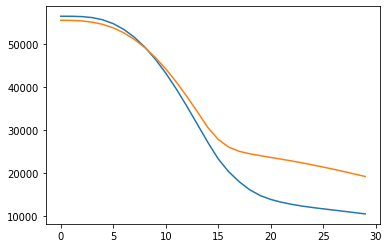

In [ ]:
import matplotlib.pyplot as plt

# plt.figure(figsize=(10,10))
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])

In [ ]:
#predict
y_pred = model.predict(X_test)

32/32 [==============================] - 1s 3ms/step


In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error



In [ ]:
r2_score(Y_test,y_pred)

-8313.19598591697

In [ ]:
mean_absolute_error(Y_test,y_pred)

28685.30399609375